In [ ]:
# Monte carlo method of reinforcement learning to evaluate each position's value on a tic tac toe game board 
# With small number of episodes The agent learns the value of each position on the game board 
# if agent plays first, corner positions are given max value, followed by center and then the edges 
# if agent plays second, center position is given max value, followed by corners and then edges 
# Doest learn any game strategies like block opponent or aim for 3 X's in a row etc 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
# state - available positions, action: next move, method: On-policy Monte Carlo 
matrix = np.zeros(9)
value_matrix = (np.ones(9))*0.5  # agent plays second
value_matrix_2 = (np.ones(9))*0.5  # agent plays first 
episode = np.arange(500)

In [3]:
# Random selection of an available position from the opponent. Also, update board with the selection 
def opponent_selection():
    available_positions = np.where(matrix==0)[0]
    opponent_selection = np.random.choice(available_positions)
    matrix[opponent_selection] = -1
    return opponent_selection

# Random selection of an available position from the agent. And update board with the selection 
def agent_random():
    available_positions = np.where(matrix==0)[0] 
    agent_selection = np.random.choice(available_positions)
    matrix[agent_selection] = 1
    return agent_selection

# selection by the agent following a greedy policy based on a state value function 
def agent_greedy():
    available_positions = np.where(matrix==0)[0] 
    inter_value = np.where(value_matrix == (value_matrix[available_positions].max()))[0]
    final_values = []
    for i,x in enumerate(inter_value):
        for k,y in enumerate(available_positions):
            if x == y:
                final_values.append(x)
    agent_selection = np.random.choice(final_values)
    matrix[agent_selection] = 1
    return agent_selection

# selection by the opponent following a greedy policy based on a state value function
def opponent_greedy():
    available_positions = np.where(matrix==0)[0] 
    inter_value = np.where(value_matrix == (value_matrix[available_positions].max()))[0]
    final_values = []
    for i,x in enumerate(inter_value):
        for k,y in enumerate(available_positions):
            if x == y:
                final_values.append(x)
    opponent_selection = np.random.choice(final_values)
    matrix[opponent_selection] = -1
    return opponent_selection

# rewards for a given board state 
def game_points():
    agent_win = np.array([1,1,1])
    opponent_win = np.array([-1,-1,-1])
    if ((matrix[0:3] == agent_win).all() | (matrix[0::4] == agent_win).all() | (matrix[0::3] == agent_win).all() | (matrix[1::3] == agent_win).all()
        | (matrix[2::3] == agent_win).all() | (matrix[2:8:2] == agent_win).all() | (matrix[3:6] == agent_win).all() | (matrix[6:9] == agent_win).all()):
        return 1
    elif ((matrix[0:3] == opponent_win).all() | (matrix[0::4] == opponent_win).all() | (matrix[0::3] == opponent_win).all() | (matrix[1::3] == opponent_win).all()
        | (matrix[2::3] == opponent_win).all() | (matrix[2:8:2] == opponent_win).all() | (matrix[3:6] == opponent_win).all() | (matrix[6:9] == opponent_win).all()):
        return -1
    else:
        return 0 

# check if agent wins 
def agent_wins():
    agent_win = np.array([1,1,1])
    if ((matrix[0:3] == agent_win).all() | (matrix[0::4] == agent_win).all() | (matrix[0::3] == agent_win).all() | (matrix[1::3] == agent_win).all()
        | (matrix[2::3] == agent_win).all() | (matrix[2:8:2] == agent_win).all() | (matrix[3:6] == agent_win).all() | (matrix[6:9] == agent_win).all()):
        return 1
    else:
        return -1 

# plot game board 
def plot_matrix(selection, agent):
    for x in range(4):
        plt.plot([x, x], [0,3], 'k')
    for y in range(4):
        plt.plot([0, 3], [y,y], 'k')
    if agent == False:
        s = plt.plot((np.mod(selection,3) + 0.5),(2.5-int(selection/3)),
                          'o',markersize=30, markeredgecolor=(1,0,0), markerfacecolor='w', markeredgewidth=2)
    else:
        s = plt.plot((np.mod(selection,3) + 0.5),(2.5-int(selection/3)),
                          'x',markersize=30, markeredgecolor=(0,1,0), markerfacecolor='w', markeredgewidth=2)

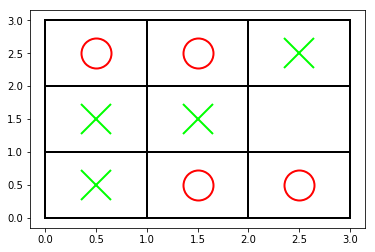

In [4]:
# update state value function based on game_points from e number of episodes with sgent playing second
# opponent first
# On-policy Monte carlo method of reinforcement learning 
reward=0
for e in episode:
    plt.clf()
    matrix = np.zeros(9)
    turn = 0 
    opponent_selections= []
    agent_selections = []
    if e == 0:
        while ((game_points() == 0) &  (turn < 8)): 
            #print(turn)
            opponent_selections.append(opponent_selection())
            plot_matrix(opponent_selections[-1],False)
            turn += 1
            if ((turn <=7) and (game_points() == 0)):
                agent_selections.append(agent_random())
                plot_matrix(agent_selections[-1],True)
                turn += 1
            else:
                continue
        reward = agent_wins()   # draw and lose are considered equally bad 
        value_matrix[agent_selections] += 0.5*(reward)
    else:
        while ((game_points() == 0) &  (turn <= 7)): 
            #print(turn)
            epsilon = np.random.rand(1)
            opponent_selections.append(opponent_selection())
            plot_matrix(opponent_selections[-1],False)
            turn += 1
            if ((turn <=7) and (game_points() == 0)):
                if epsilon < 0.5:
                    agent_selections.append(agent_random())
                else:
                    agent_selections.append(agent_greedy())
                plot_matrix(agent_selections[-1],True)
                turn += 1
            else:
                continue
        reward = agent_wins()   # draw and lose are considered equally bad
        value_matrix[agent_selections] += 0.5*(reward)

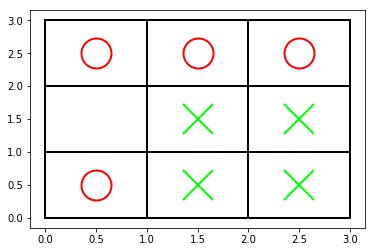

In [8]:
# update state value function based on game_points from e number of episodes with agent playing first 
# agent first
# On-policy Monte carlo method of reinforcement learning 
reward=0
for e in episode:
    plt.clf()
    matrix = np.zeros(9)
    turn = 0 
    opponent_selections= []
    agent_selections = []
    if e == 0:
        while ((game_points() == 0) &  (turn < 8)): 
            #print(turn)
            agent_selections.append(agent_random())
            plot_matrix(agent_selections[-1],True)
            turn += 1
            if ((turn <=7) and (game_points() == 0)):
                opponent_selections.append(opponent_selection())
                plot_matrix(opponent_selections[-1],False)
                turn += 1
            else:
                continue
        reward = agent_wins()   # draw and lose are considered equally bad 
        value_matrix_2[agent_selections] += 0.5*(reward)
    else:
        while ((game_points() == 0) &  (turn <= 7)): 
            #print(turn)
            epsilon = np.random.rand(1)
            if epsilon < 0.5:
                agent_selections.append(agent_random())
            else:
                agent_selections.append(agent_greedy())
            plot_matrix(agent_selections[-1],True)
            turn += 1
            if ((turn <=7) and (game_points() == 0)):
                opponent_selections.append(opponent_selection())
                plot_matrix(opponent_selections[-1],False)
                turn += 1
            else:
                continue
        reward = agent_wins()   # draw and lose are considered equally bad
        value_matrix_2[agent_selections] += 0.5*(reward)

In [ ]:
# Play the game with a greedy agent and a random opponent 
matrix = np.zeros(9)
def play_game():
    turn =0
    opponent_selections= []
    agent_selections = []
    while ((game_points() == 0) &  (turn < 8)): 
        #print(turn)
        opponent_selections.append(opponent_selection())
        #opponent_selections.append(opponent_greedy())
        print(np.where(matrix==0))
        plot_matrix(opponent_selections[-1],False)
        turn += 1
        if ((turn <=7) and (game_points() == 0)):
            agent_selections.append(agent_greedy())
            print(np.where(matrix==0))
            plot_matrix(agent_selections[-1],True)
            turn += 1
        else:
            continue
        reward = game_points()
    print(matrix, game_points(), agent_selections,opponent_selections)
    if game_points() == 1:
        print('agent wins')
    elif game_points() == -1:
        print('opponent wins')
    else:
        print('draw')
play_game()